# Exploratory Data Analysis on Gold Price

<img src="https://www.forbes.com/advisor/wp-content/uploads/2023/04/gold_prices.jpg" width="600" height="300"><br>

## Data Overview

This project utilizes a comprehensive dataset of historical gold prices, capturing detailed price and volume information across various trading sessions. Each entry corresponds to a specific time window, documenting open, high, low, close prices, and trading volume.

Gold, as a globally traded commodity, serves as a barometer for economic health, currency strength, and geopolitical stability. Through exploratory data analysis (EDA), this study aims to:

- Identify long-term trends and patterns in gold prices.
- Quantify market volatility using daily price ranges.
- Examine the correlation between trading volume and price fluctuations.
- Provide insights to support predictive modeling and informed investment decisions.

By systematically analyzing this dataset, we can better understand the dynamics driving gold price movements and their broader economic implications.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [17]:
volume =['timeOpen','timeClose','timeHigh','timeLow','priceOpen','priceHigh','priceLow','priceClose','volume']


#### 1. Load & Clean Dataset

In [18]:
file_path = "Gold_price_2025 new.csv"  # Update path if needed
df = pd.read_csv(file_path)

In [19]:
df["volume"].value_counts()

volume
0           220
100,81        2
102,34        2
6846,43       2
42757,89      2
           ... 
10,07         1
27,34         1
43,33         1
312,79        1
1008,92       1
Name: count, Length: 441, dtype: int64

##### Convert price columns to float

In [20]:
for col in ['priceOpen', 'priceHigh', 'priceLow', 'priceClose']:
    df[col] = df[col].str.replace(',', '.').astype(float)


##### Convert timestamps to datetime

In [21]:
df['timeOpen'] = pd.to_datetime(df['timeOpen'], unit='ms')
df['timeClose'] = pd.to_datetime(df['timeClose'], unit='ms')


##### Sort by time

In [22]:
df = df.sort_values('timeOpen')


### 2. Dataset Overview

In [23]:
print("Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nDate Range:", df['timeOpen'].min(), "to", df['timeOpen'].max())
print("\nSummary Statistics:\n", df.describe())

Shape: (664, 9)

Missing Values:
 timeOpen      0
timeClose     0
timeHigh      0
timeLow       0
priceOpen     0
priceHigh     0
priceLow      0
priceClose    0
volume        0
dtype: int64

Date Range: 2023-09-28 11:20:00 to 2025-07-26 11:40:00

Summary Statistics:
                             timeOpen                      timeClose  \
count                            664                            664   
mean   2024-08-27 09:15:05.421686784  2024-08-28 09:15:06.024096512   
min              2023-09-28 11:20:00            2023-09-29 12:20:00   
25%              2024-03-14 06:25:00            2024-03-15 05:20:00   
50%              2024-08-26 23:30:00            2024-08-28 00:30:00   
75%              2025-02-09 17:35:00            2025-02-10 18:35:00   
max              2025-07-26 11:40:00            2025-07-27 12:40:00   
std                              NaN                            NaN   

           timeHigh       timeLow   priceOpen   priceHigh    priceLow  \
count  6.640000e+0

### 3. Price Trend Over Time

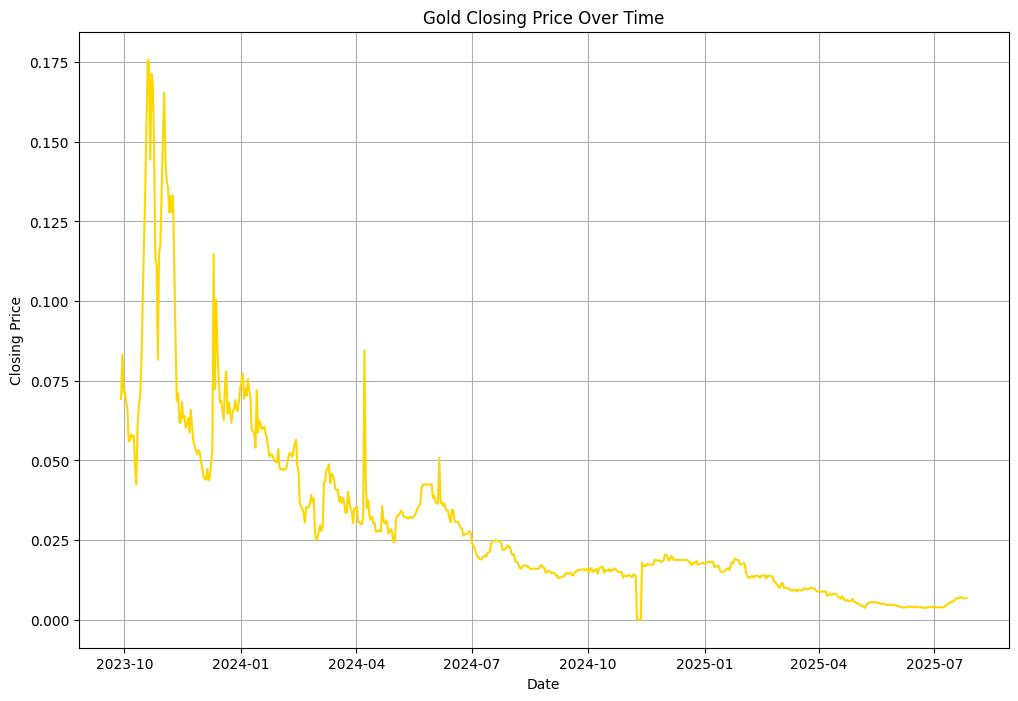

In [24]:
plt.figure(figsize=(12, 8))
plt.plot(df['timeOpen'], df['priceClose'], color='gold')
plt.title("Gold Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.grid(True)
plt.show()

##### Monthly average prices

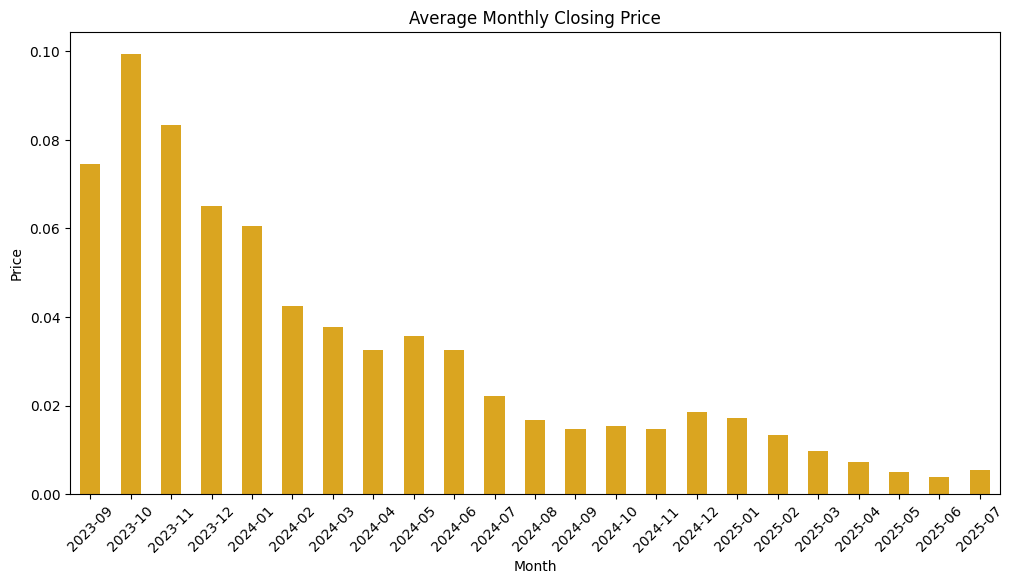

In [25]:
df['Month'] = df['timeOpen'].dt.to_period('M')
monthly_avg = df.groupby('Month')['priceClose'].mean()

plt.figure(figsize=(12, 6))
monthly_avg.plot(kind='bar', color='goldenrod')
plt.title("Average Monthly Closing Price")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

### 4. Price Distribution

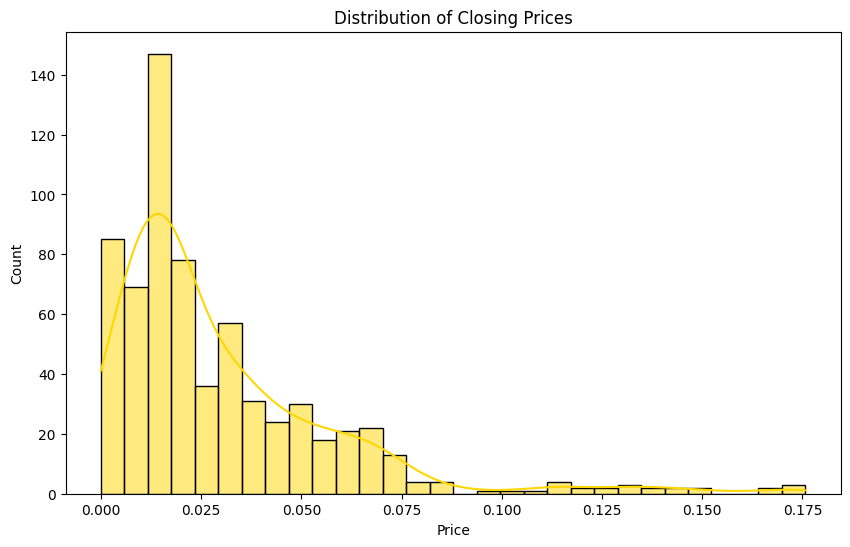

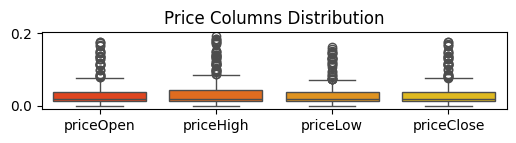

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df['priceClose'], bins=30, kde=True, color='gold')
plt.title("Distribution of Closing Prices")
plt.xlabel("Price")
plt.show()

plt.figure(figsize=(6, 1))
sns.boxplot(data=df[['priceOpen', 'priceHigh', 'priceLow', 'priceClose']], palette="autumn")
plt.title("Price Columns Distribution")
plt.show()

### 5. Relationships Between Prices

plt.figure(figsize=(6, 6))
sns.scatterplot(x='priceOpen', y='priceClose', data=df, color='orange')
plt.title("Opening Price vs Closing Price")
plt.show()

plt.figure(figsize=(6, 6))
sns.scatterplot(x='priceHigh', y='priceLow', data=df, color='red')
plt.title("High Price vs Low Price")
plt.show()


##### Daily price range

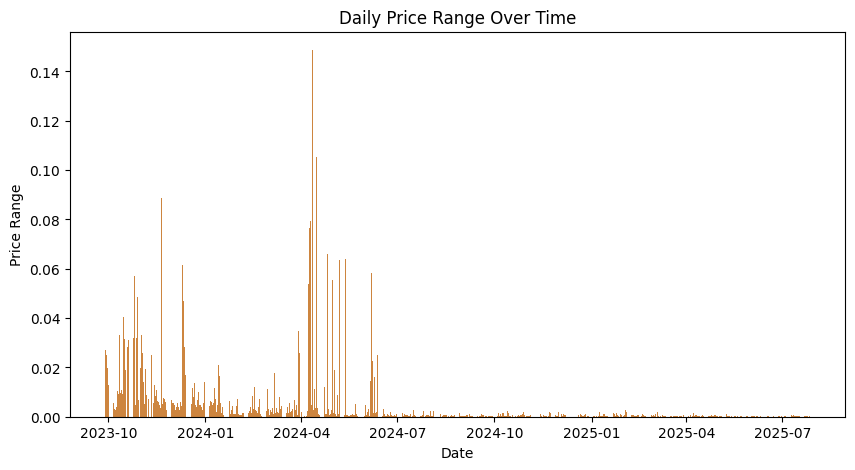

In [27]:
df['Daily Range'] = df['priceHigh'] - df['priceLow']
plt.figure(figsize=(10, 5))
plt.bar(df['timeOpen'], df['Daily Range'], color='peru')
plt.title("Daily Price Range Over Time")
plt.xlabel("Date")
plt.ylabel("Price Range")
plt.show()

### 6. Outlier Detection

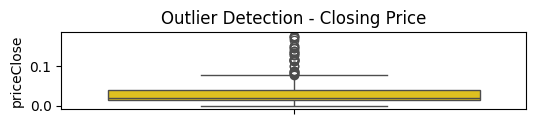

In [28]:
plt.figure(figsize=(6, 1))
sns.boxplot(y='priceClose', data=df, color='gold')
plt.title("Outlier Detection - Closing Price")
plt.show()

# Data Visualization

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Load Dataset

In [30]:
df = pd.read_csv("Gold_price_2025 new.csv")

##### Data Cleaning 

In [31]:
df['timeOpen'] = pd.to_datetime(df['timeOpen'])
df['timeClose'] = pd.to_datetime(df['timeClose'])
numeric_cols = ['priceOpen', 'priceHigh', 'priceLow', 'priceClose', 'volume']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

##### Sort by Date

In [32]:
df.sort_values('timeOpen', inplace=True)

##### Dataset Overview

In [33]:
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())

Dataset Shape: (664, 9)

Data Types:
 timeOpen      datetime64[ns]
timeClose     datetime64[ns]
timeHigh             float64
timeLow              float64
priceOpen            float64
priceHigh            float64
priceLow             float64
priceClose           float64
volume               float64
dtype: object

Missing Values:
 timeOpen        0
timeClose       0
timeHigh        0
timeLow         0
priceOpen     660
priceHigh     660
priceLow      660
priceClose    660
volume        442
dtype: int64

Summary Statistics:
                             timeOpen                      timeClose  \
count                            664                            664   
mean   1970-01-01 00:28:44.750105421  1970-01-01 00:28:44.836506024   
min       1970-01-01 00:28:15.900000     1970-01-01 00:28:15.990000   
25%       1970-01-01 00:28:30.397500     1970-01-01 00:28:30.480000   
50%       1970-01-01 00:28:44.715000     1970-01-01 00:28:44.805000   
75%       1970-01-01 00:28:59.122500     1970-

##### Missing Values Heatmap

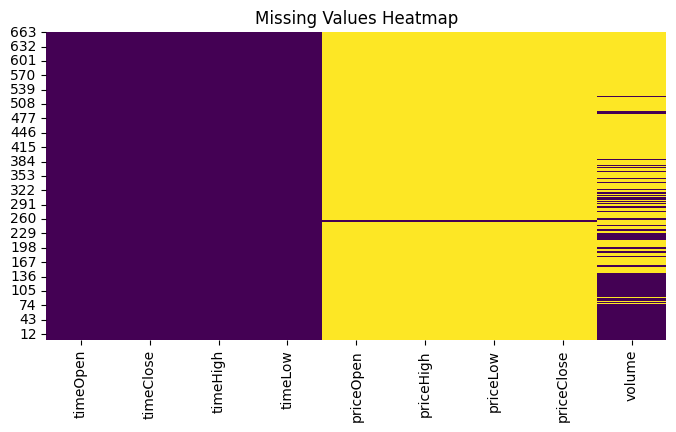

In [34]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

##### Closing Price Over Time

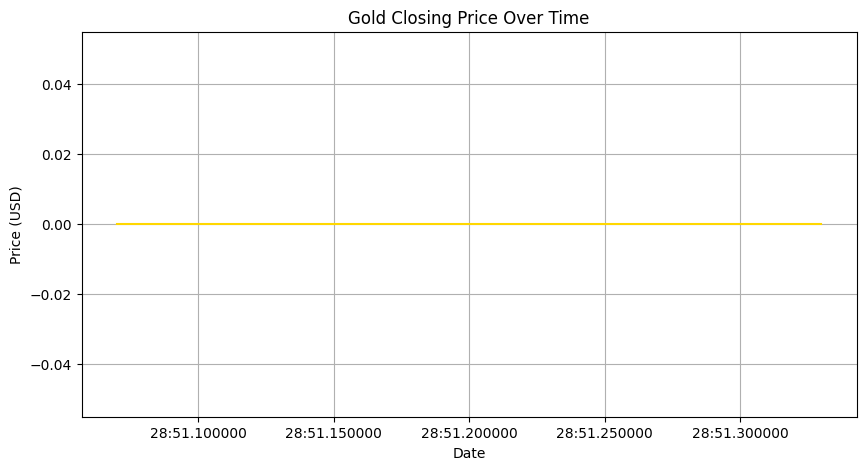

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(df['timeOpen'], df['priceClose'], color='gold')
plt.title("Gold Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()

##### Monthly Average Prices

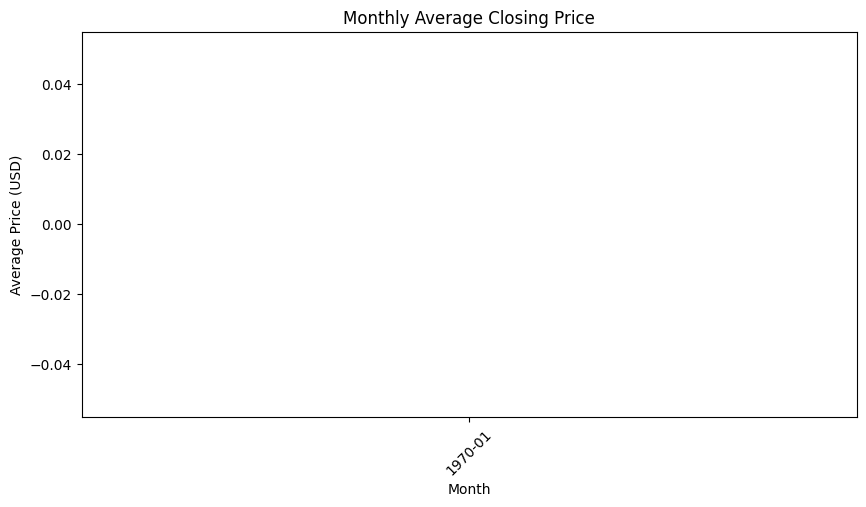

In [36]:
df['Month'] = df['timeOpen'].dt.to_period('M')
monthly_avg = df.groupby('Month')['priceClose'].mean()
plt.figure(figsize=(10, 5))
monthly_avg.plot(kind='bar', color='orange')
plt.title("Monthly Average Closing Price")
plt.xlabel("Month")
plt.ylabel("Average Price (USD)")
plt.xticks(rotation=45)
plt.show()

##### Price Distribution (Histogram + KDE)

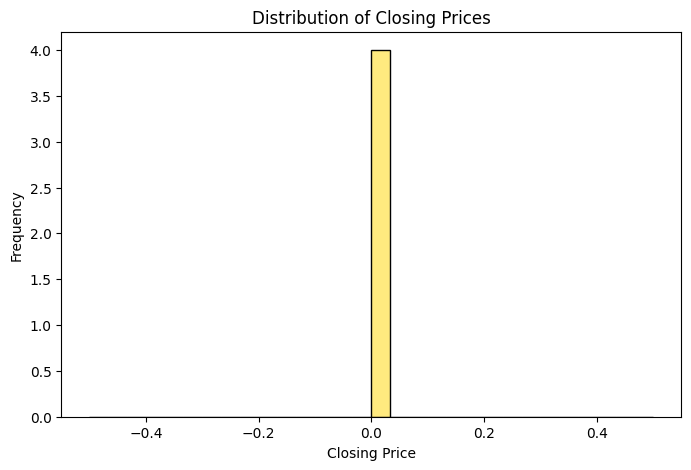

In [37]:
plt.figure(figsize=(8, 5))
sns.histplot(df['priceClose'], kde=True, color='gold', bins=30)
plt.title("Distribution of Closing Prices")
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.show()

##### for Price Columns

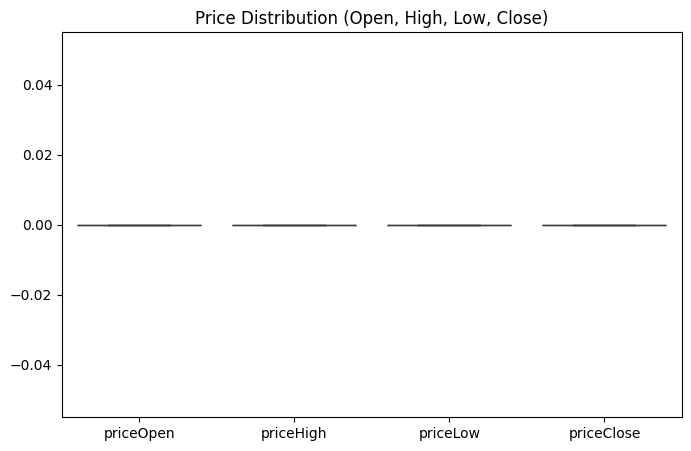

In [38]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[['priceOpen', 'priceHigh', 'priceLow', 'priceClose']])
plt.title("Price Distribution (Open, High, Low, Close)")
plt.show()

##### Open vs Close

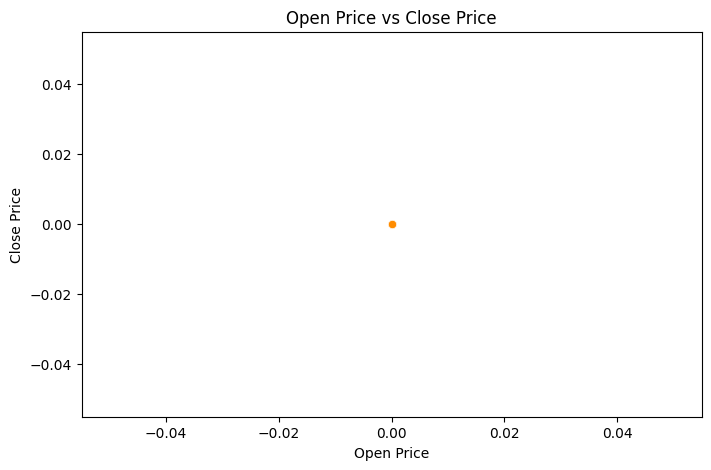

In [39]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='priceOpen', y='priceClose', data=df, color='darkorange')
plt.title("Open Price vs Close Price")
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.show()

##### High vs Low

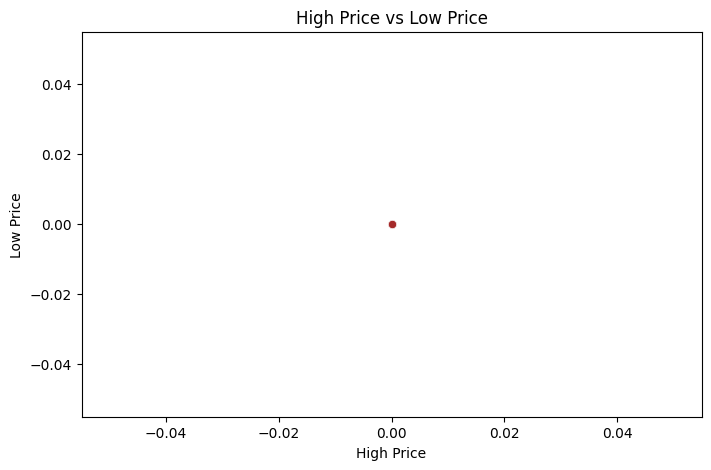

In [40]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='priceHigh', y='priceLow', data=df, color='brown')
plt.title("High Price vs Low Price")
plt.xlabel("High Price")
plt.ylabel("Low Price")
plt.show()

##### Daily Price Range

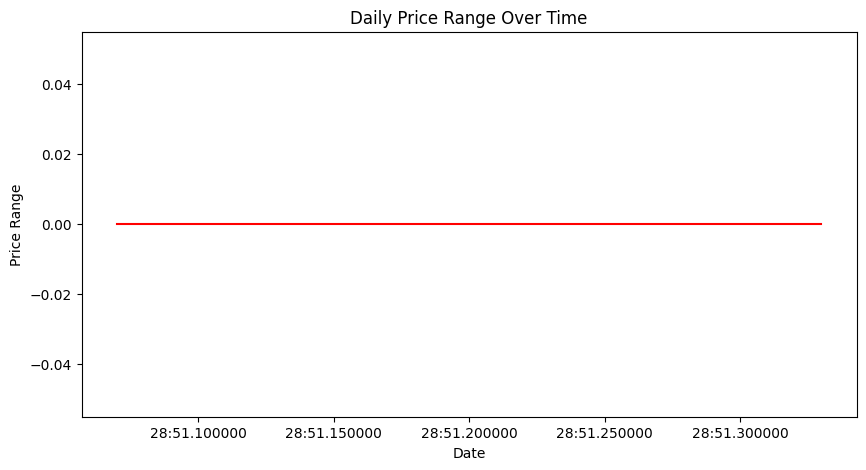

In [41]:
df['Daily Range'] = df['priceHigh'] - df['priceLow']
plt.figure(figsize=(10, 5))
plt.plot(df['timeOpen'], df['Daily Range'], color='red')
plt.title("Daily Price Range Over Time")
plt.xlabel("Date")
plt.ylabel("Price Range")
plt.show()

##### Volume vs Daily Range

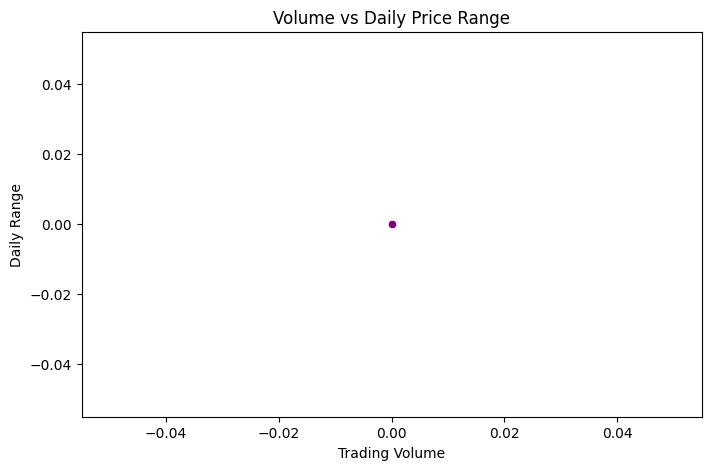

In [42]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='volume', y='Daily Range', data=df, color='purple')
plt.title("Volume vs Daily Price Range")
plt.xlabel("Trading Volume")
plt.ylabel("Daily Range")
plt.show()

##### Outlier Detection

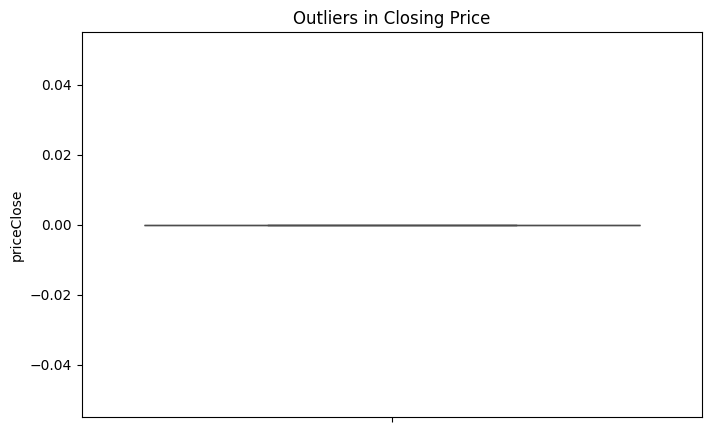

In [43]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['priceClose'], color='gold')
plt.title("Outliers in Closing Price")
plt.show()

##### Correlation 

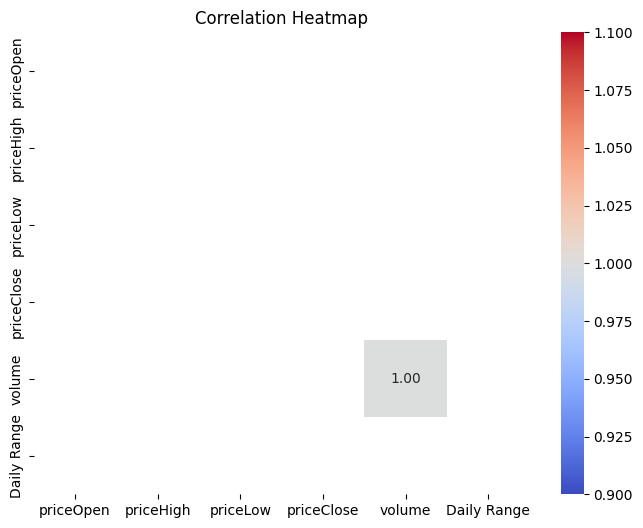

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols + ['Daily Range']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Project Summary – Gold Price Analysis

This project conducts an in-depth exploratory data analysis (EDA) of historical gold prices, focusing on trends, volatility, and the relationship between trading volume and price movements. The dataset includes detailed records of open, high, low, and close prices, as well as trading volumes across multiple time periods.

Key findings from the analysis include:

- **Trend Identification:** Closing prices reveal clear long-term trends in gold’s value, providing insights into market direction over time.
- **Volatility Assessment:** Daily price ranges quantify market volatility, highlighting periods of increased price fluctuation.
- **Volume Impact:** Analysis shows that spikes in trading volume often coincide with significant price changes, indicating a strong relationship between market activity and price dynamics.
- **Data Quality:** The dataset contains missing values, particularly in price and volume columns, which were addressed through data cleaning and visualization techniques.

Overall, the insights gained from this analysis can inform future forecasting models and support data-driven investment decisions in the gold market.

### Future Work – Gold Price EDA Project

### Future Work

To further enhance the insights and utility of this gold price analysis, the following directions are recommended:

- **Predictive Modeling:** Develop and evaluate forecasting models such as ARIMA and LSTM to predict future gold prices based on historical trends.
- **Integration of External Factors:** Incorporate macroeconomic indicators (e.g., currency exchange rates, inflation, global market indices) to enrich the analysis and improve model accuracy.
- **Interactive Visualization:** Build an interactive dashboard for real-time monitoring and visualization of gold price movements and related metrics.
- **Sentiment Analysis:** Analyze news headlines and social media sentiment to assess their influence on gold price fluctuations and market dynamics.

These steps will provide a more comprehensive understanding of the factors driving gold prices and support more informed decision-making for investors and analysts.


### References
* Medium: https://medium.com/code-heroku/introduction-to-exploratory-data-analysis-eda-c0257f888676
* Kaggle: https://www.kaggle.com/code/spscientist/a-simple-tutorial-on-exploratory-data-analysis
* kaggle: https://www.kaggle.com/datasets/willianoliveiragibin/gold-price-2025